In [1]:
import pandas as pd

dateparser = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')

bseg = pd.read_csv("BSEG_15_16_17.txt", delim_whitespace=True, parse_dates=['H_BUDAT', 'H_BLDAT', 'VALUT'], 
                   date_parser=dateparser, thousands='.', decimal=',')
bseg.head()

,GJAHR,H_BUDAT,H_BLDAT,VALUT,DMBTR,H_HWAER,WRBTR,H_WAERS,MATNR,MENGE,MEINS,WERKS
0,2016,2016-01-02,2016-01-02,2016-01-12,7046897.45,RUB,107387.84,USD,S_0102100_0001,427.84,TO,1012
1,2016,2016-01-02,2016-01-02,2016-01-12,4104541.05,RUB,62549.20,USD,S_0102100_0002,249.20,TO,1012
2,2016,2016-01-02,2016-01-02,2016-01-12,651619.15,RUB,9930.04,USD,S_0102100_0359,34.36,TO,1012
3,2016,2016-01-02,2016-01-02,2016-01-12,7046897.45,RUB,107387.84,USD,S_0102100_0001,427.84,TO,1012
4,2016,2016-01-02,2016-01-02,2016-01-12,4104541.05,RUB,62549.20,USD,S_0102100_0002,249.20,TO,1012


In [2]:
bseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
GJAHR      15000 non-null int64
H_BUDAT    15000 non-null datetime64[ns]
H_BLDAT    15000 non-null datetime64[ns]
VALUT      15000 non-null datetime64[ns]
DMBTR      15000 non-null float64
H_HWAER    15000 non-null object
WRBTR      15000 non-null float64
H_WAERS    15000 non-null object
MATNR      15000 non-null object
MENGE      15000 non-null float64
MEINS      15000 non-null object
WERKS      15000 non-null int64
dtypes: datetime64[ns](3), float64(3), int64(2), object(4)
memory usage: 1.4+ MB


In [3]:
bseg.describe()

,GJAHR,DMBTR,WRBTR,MENGE,WERKS
count,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.0
mean,2015.699400,1.824313e+07,2.794661e+05,905.141454,1012.0
std,0.662522,2.993478e+07,4.767607e+05,1522.021686,0.0
min,2015.000000,2.327813e+04,3.136800e+02,4.800000,1012.0
25%,2015.000000,3.062245e+06,4.408701e+04,139.440000,1012.0
50%,2016.000000,1.130077e+07,1.651195e+05,586.840000,1012.0
75%,2016.000000,2.350033e+07,3.591740e+05,1226.565000,1012.0
max,2017.000000,6.357054e+08,1.002273e+07,32465.890000,1012.0


In [4]:
cash = bseg.drop(["H_BUDAT", "H_BLDAT", "H_HWAER", "WRBTR", "H_WAERS", "MATNR", "MENGE", "MEINS", "WERKS", "GJAHR"], axis=1)
cash.head()

,VALUT,DMBTR
0,2016-01-12,7046897.45
1,2016-01-12,4104541.05
2,2016-01-12,651619.15
3,2016-01-12,7046897.45
4,2016-01-12,4104541.05


In [5]:
byday = cash.groupby('VALUT').sum().reset_index()
byday.head()

,VALUT,DMBTR
0,2015-01-16,1.016207e+09
1,2015-01-19,1.365947e+09
2,2015-01-20,1.361941e+09
3,2015-01-23,3.806104e+08
4,2015-01-26,5.298301e+08


In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [7]:
byday.describe()

,DMBTR
count,3.960000e+02
mean,6.910278e+08
std,6.103512e+08
min,3.907132e+05
25%,1.518954e+08
50%,6.232036e+08
75%,1.017591e+09
max,4.128079e+09


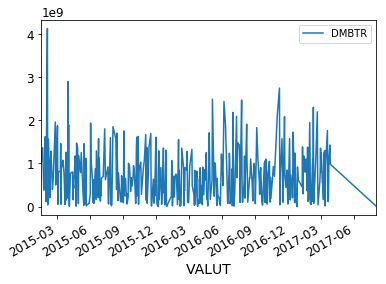

In [8]:
byday.plot(x='VALUT', y='DMBTR')

In [9]:
byday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
VALUT    396 non-null datetime64[ns]
DMBTR    396 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


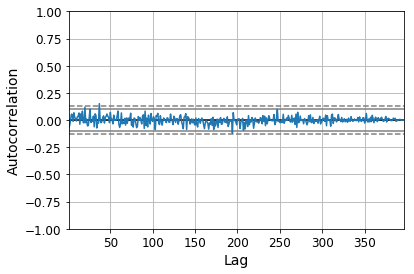

In [10]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = byday.DMBTR.T.squeeze()
autocorrelation_plot(series)

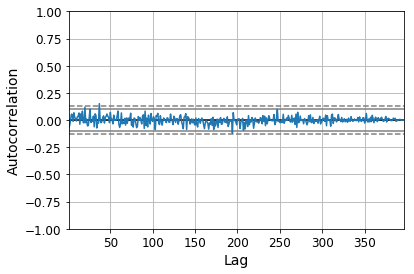

In [21]:
autocorrelation_plot(byday.DMBTR)

C:\Users\Yaroslav\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


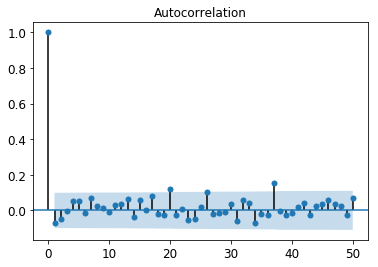

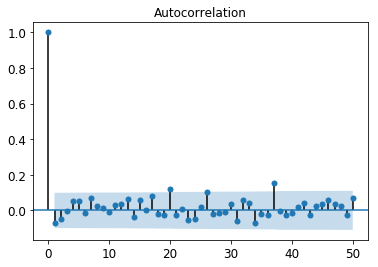

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=50)

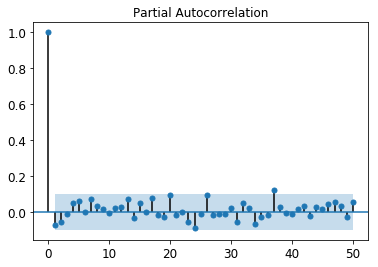

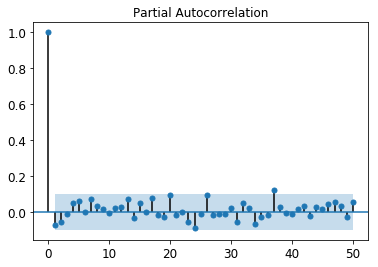

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)